Model: "BILSTM-Attention"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input-Layer (InputLayer)    [(None, 200)]             0         
                                                                 
 Embedding-Layer (Embedding  (None, 200, 60)           600000    
 )                                                               
                                                                 
 bidirectional_4 (Bidirecti  (None, 200, 128)          64000     
 onal)                                                           
                                                                 
 attention_4 (attention)     (None, 200, 128)          328       
                                                                 
 dropout_1 (Dropout)         (None, 200, 128)          0         
                                                                 
 Output-Layer (Dense)        (None, 200, 1)       

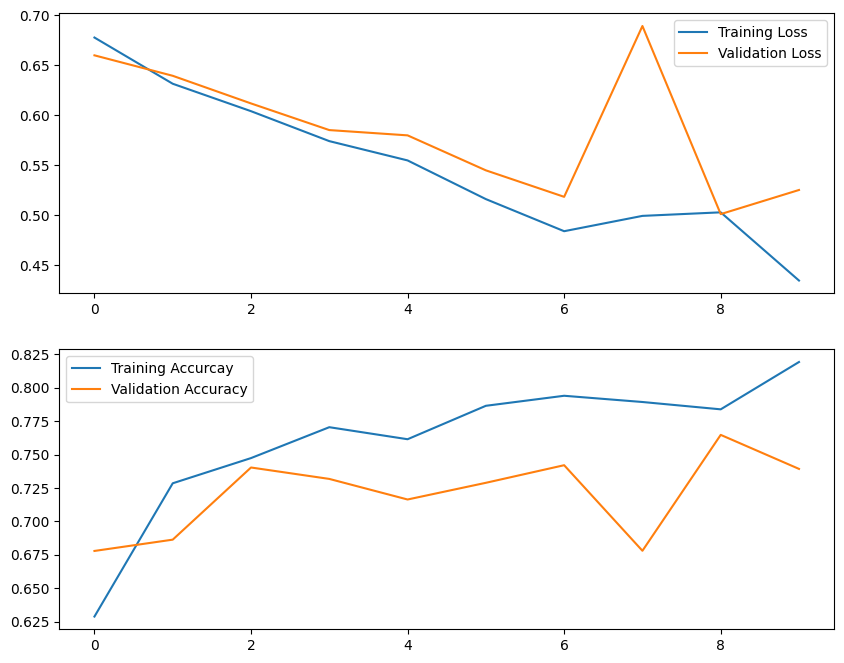

In [6]:
import numpy as np
from keras.preprocessing import sequence
#from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Embedding, LSTM, Bidirectional 
from keras.datasets import imdb 
from keras.layers import *
from keras.models import Model
#from keras.models import *
from keras import backend as K
import matplotlib.pyplot as plt 


class attention(Layer):
    def __init__(self,return_sequences=True,name='Attention'):
        self.return_sequences = return_sequences

        
        super(attention,self).__init__()

    def build(self, input_shape):
        self.W=self.add_weight(name="att_weight", shape=(input_shape[-1],1),
            initializer="normal")
        self.b=self.add_weight(name="att_bias", shape=(input_shape[1],1),
            initializer="zeros")
    


    def call(self, x):
        e = K.tanh(K.dot(x,self.W)+self.b)
        a = K.softmax(e, axis=1)
        output = x*a
        if self.return_sequences:

            return output
        return K.sum(output, axis=1)


class BiLSTM_Attention:
    def __init__(self,n_vocab, latent_dim, max_seq_len):
        self.vocab_size = n_vocab 
        self.latent_dim = latent_dim 
        self.max_seq_len = max_seq_len 
        self.get_model()
        
    
    def get_model (self, ):
        input_layer = Input (shape=(self.max_seq_len, ),name="Input-Layer")
        embd = Embedding(self.vocab_size, self.latent_dim, input_length=self.max_seq_len,name='Embedding-Layer') (input_layer)
        y = Bidirectional(LSTM(64, return_sequences=True)) (embd)
        #y = LSTM(64, return_sequences=True) (embd)
        y = attention(return_sequences=True, name='Attention-Layer') (y) 
        y = Dropout(0.5) (y)
        output = Dense(1, activation='sigmoid',name='Output-Layer') (y)
        self.model = Model (input_layer, output, name='BILSTM-Attention')
        print(self.model.summary())


    def fit_data (self, x_train,y_train, x_test, y_test, epochs):
        batch_size = 40 
        self.model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

        hist = self.model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=[x_test, y_test])
        return hist 


def plot_history (hist):
        
    fig, axs  = plt.subplots (2,1,figsize=(10,8))
    axs[0].plot(hist.history['loss'],label='Training Loss')
    axs[0].plot(hist.history['val_loss'],label='Validation Loss')
    axs[1].plot(hist.history['accuracy'],label='Training Accurcay')
    axs[1].plot(hist.history['val_accuracy'],label='Validation Accuracy')
    axs[0].legend()
    axs[1].legend()
    plt.show()



def get_data ():
    
    n_unique_words = 10000
    (x_train, y_train),(x_test, y_test) = imdb.load_data(num_words=n_unique_words)
    maxlen = 200
    x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
    x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
    y_train = np.array(y_train)
    y_test = np.array(y_test)
    # Our vectorized labels
    y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
    y_test = np.asarray(y_test).astype('float32').reshape((-1,1))
    return x_train, y_train, x_test, y_test 
     



if __name__ == "__main__":
      num_epochs = 10 
      vocab_size  = 10000
      max_seq_len  = 200
      latent_dim  = 60 

      M =   BiLSTM_Attention (vocab_size, latent_dim, max_seq_len)
              
      x_train, y_train, x_test, y_test = get_data() 

      print("Train:",x_train.shape, y_train.shape)
      print("Test:",x_test.shape, y_test.shape)
    
      #print("x_train:",x_train[1,:],y_train[1])
 
      hist = M.fit_data (x_train,y_train, x_test, y_test, num_epochs)

      plot_history (hist)




